Number of words:  1328
Number of sentences:  67
No. of hapaxes:  363
Size of Vocabulary:  518
Length of sentences:  19.82089552238806
[('the', 69), ('and', 52), ('of', 51), ('in', 39), ('a', 35), ('to', 33), ('language', 29), ('study', 22), ('linguistics', 20), ('is', 20)]


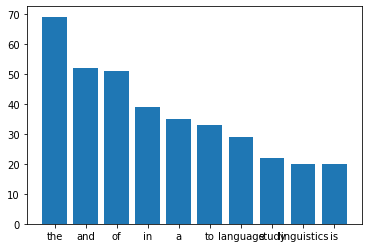

times
67 67
linguistics is the study of language
people who study language are called linguists
there are five main parts of linguistics: the study of sounds (phonology) the study of parts of words like un- and -ing (morphology) the study of word order and how sentences are made the study of the meaning of words (semantics) and the study of the unspoken meaning of speech that is separate from the literal meaning of what is said (for example saying i'm cold to get someone to turn off the fan (pragmatics)
there are many ways to use linguistics every day
some linguists are theoretical linguists and study the theory and ideas behind language such as historical linguistics the study of the history of language and how it has changed or the study of how different groups of people may use language differently
some linguists are applied linguists and use linguistics to do things
for example forensic linguistics is used in crime investigations and computational linguistics is used to help make c

In [2]:
import nltk, re, pprint
from nltk import word_tokenize
import re
import string

file = open('simpleenglish.txt')

text = ''

for line in file:
    if line != "[Illustration]\n":
        text += line.replace('\n',' ').replace('\"', '').replace('!','.').replace('?','.').replace(',','')
        if len(text.split())> 990:
            break
sentences = text.split('.')
sentences = [x.lower().strip(string.whitespace) for x in sentences]
tokenized = [re.findall(r'[\w]+',sentence) for sentence in sentences]
tokens = [item for sublist in tokenized for item in sublist]




# Number of words
length = [len(x) for x in tokenized]
length = sum(length)
print("Number of words: ", length)

# No sentences
no_sentences = len(sentences)
print("Number of sentences: ", no_sentences)

# Hapaxes
count = {}
for sentence in tokenized:
    for word in sentence:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

hapaxes = []
for word in count.keys():
    if count[word] == 1:
        hapaxes.append(word)
print("No. of hapaxes: ",len(hapaxes))

# Lemmas
wnl = nltk.WordNetLemmatizer()
lemmas = {wnl.lemmatize(t) for t in tokens}
print("Size of Vocabulary: ",len(lemmas))

# Length of sentences
print("Length of sentences: ", length/(no_sentences))

# Most frequent words
freq = dict()
for word in tokens:
    w = wnl.lemmatize(word)
    if w in freq:
        freq[w] += 1
    else:
        freq[w] = 1
freq = list(freq.items())
freq.sort(reverse = True, key = lambda x: x[1])
print(freq[:10])


import matplotlib.pyplot as plt

frequencies = [x[1] for x in freq]
lab = [x[0] for x in freq]

plt.bar(lab[:10],frequencies[:10])
plt.show()

# No of spelling mistakes
f = open('wordlist.txt')
wordlist = []
for word in f:
    wordlist.append(word)
wordlist = set(wordlist)
misspelled = []
for word in tokens:
    if word not in wordlist:
        misspelled.append(word)
print(word)

print(len(sentences), len(tokenized))

for sentence in sentences:
    print(sentence)


# marked = [nltk.pos_tag(text) for text in tokenized]


# freq_per_cat = {}
# marked = [nltk.pos_tag(text) for text in tokenized]
# for sentence in marked:
#     #{NN: {word: freq}}
#     for word in sentence:
#         if word[1] in freq_per_cat:
#             if word[0] in freq_per_cat[word[1]]:
#                 freq_per_cat[word[1]][word[0]] += 1
#             else:
#                 freq_per_cat[word[1]][word[0]] = 1
#         else:
#             freq_per_cat[word[1]] = {word[0] : 1}
            
# print(marked)

# nltk.download('averaged_perceptron_tagger')


# print(sentences[:15], sentences[15::])

# vocab = {}

# for s in marked:
#     for word in s:
#         if word[1] not in vocab:
#             vocab[word[1]] = [word[0]]
#         else:
#             vocab[word[1]].append(word[0])
# print(vocab)

# import nltk
# from nltk import CFG

# f = open("grmmr2.txt", 'r')
# grammar = ''
# for line in f:
#     grammar += line

# cfg_1 = CFG.fromstring(grammar)
# print(cfg_1)

# import nltk

# parser = nltk.parse.ChartParser(cfg_1)
# sent = 'danger sometimes comes from a source that is least suspected'.split()
# chart = parser.parse(sent)
    

# for i in chart:
#     print(i)

# x = 2
# if (x := )